# LOGISTIC REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the Data

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Observed multiple Zeros in features
# How many are zeros for each feature to check

zero = (data == 0).sum()
Zeros = pd.DataFrame({'column':zero.index,'Zeros_count':zero.values})
Zeros

,column,Zeros_count
0,Pregnancies,111
1,Glucose,5
2,BloodPressure,35
3,SkinThickness,227
4,Insulin,374
5,BMI,11
6,DiabetesPedigreeFunction,0
7,Age,0
8,Outcome,500


In [6]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    data[col] = data[col].replace(0, data[col].median())
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [7]:
# checking duplicates

data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


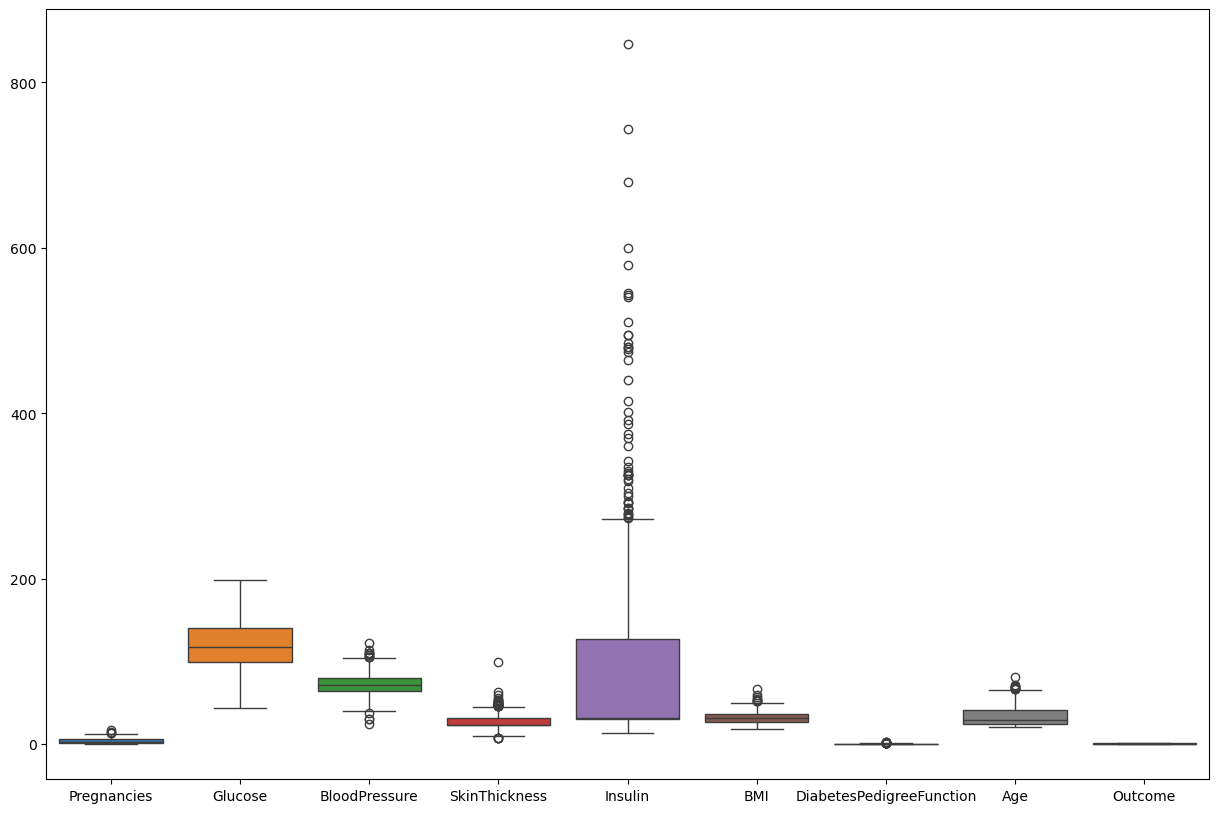

In [9]:
# checking Outliers
plt.figure(figsize=(15,10))
sns.boxplot(data)
plt.show()

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
Outliers = ((data > (Q3+(1.5*IQR))) | (data < (Q1-(1.5*IQR)))).sum()
Outliers

Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness               35
Insulin                     49
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

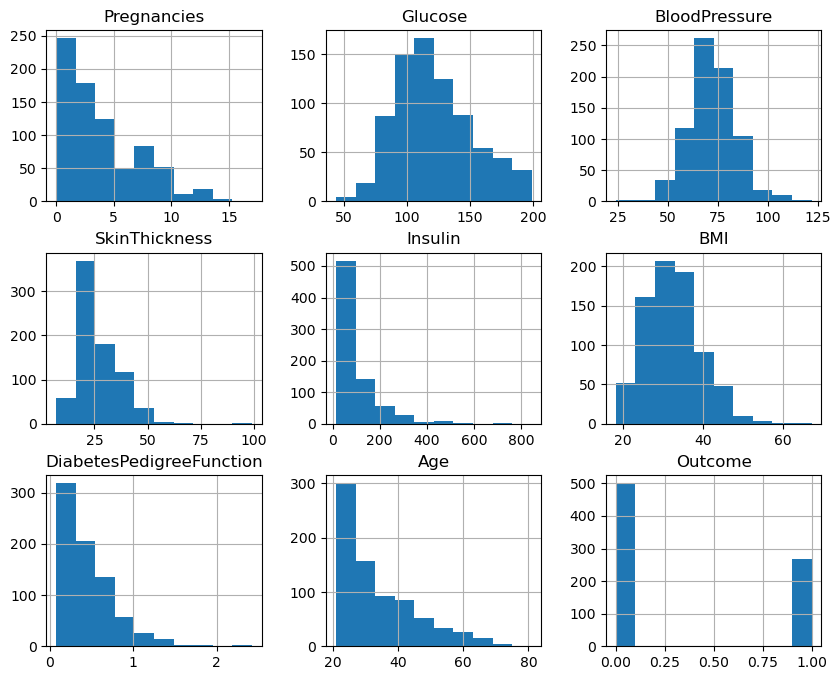

In [11]:
## distribution of data

data.hist(bins=10, figsize=(10,8))
plt.show()

In [12]:
# check correlation

data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


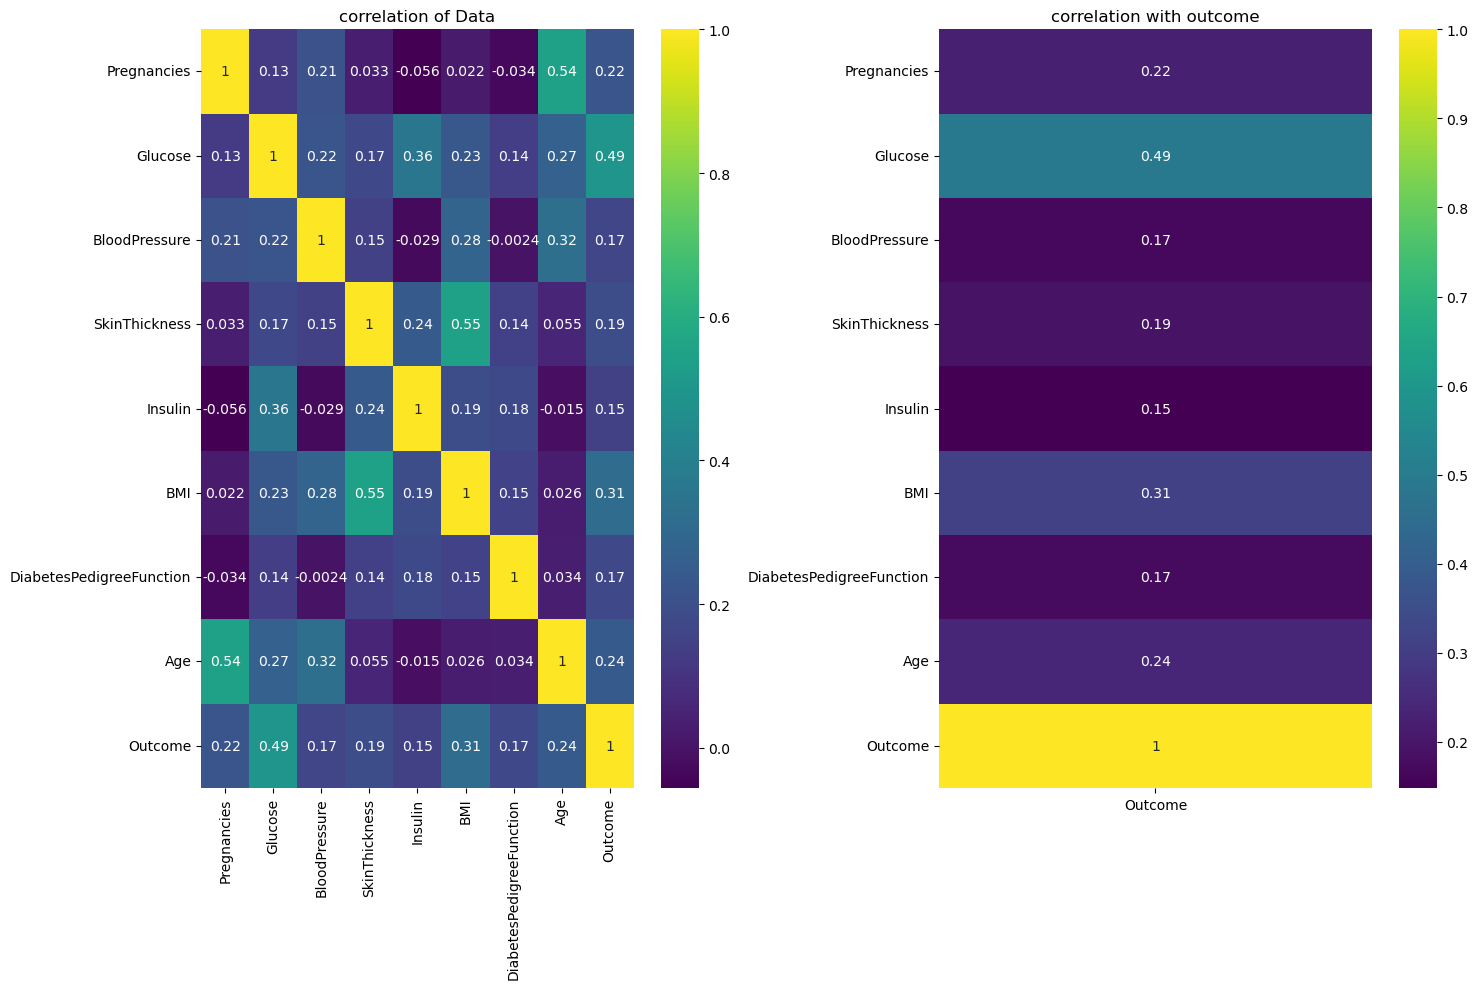

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('correlation of Data')

plt.subplot(1,2,2)
sns.heatmap(data.corr()[['Outcome']], annot=True, cmap='viridis')
plt.title('correlation with outcome')
plt.tight_layout()
plt.show()

- All features are weak Positive correlation

#### # Separate feature (X) and Target (y)

In [14]:

X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [17]:
# using stratify because data is imbalnced
# stratify = y [It keeps class distribution same in train & test sets.]

print(y.value_counts())
print(y.value_counts(normalize=True))

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [18]:
# standardizing the feature
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X, columns=X.columns)
SS_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496


In [19]:
# train and split the data

from sklearn.model_selection import train_test_split

SS_X_train, SS_X_test, y_train, y_test = train_test_split(SS_X, y, test_size=0.2, random_state=42, stratify=y)
SS_X_train.shape, SS_X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

####  logical regression model building

In [36]:
# evaluating on Train data
# class_weight="balanced" handles class imbalance

from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(class_weight='balanced', max_iter=1000)
model_LR.fit(SS_X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

#### Evaluating on Training data

In [37]:
y_pred_train = model_LR.predict(SS_X_train)
y_pred_prob_train = model_LR.predict_proba(SS_X_train)[:,1]

In [38]:
# Evaluate the model with using metrics

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, log_loss

In [39]:
# for Evaluating metrics

def evalute_logisticreg(y, y_pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    accu = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    
    print('Accuracy for testing :',np.round(accu,3))
    print('Precision for testing :',np.round(prec,3))
    print('Recall for testing :',np.round(recall,3))
    print('F1 for testing :',np.round(f1,3))
    

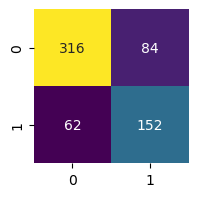

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       400
           1       0.64      0.71      0.68       214

    accuracy                           0.76       614
   macro avg       0.74      0.75      0.74       614
weighted avg       0.77      0.76      0.76       614

Accuracy for testing : 0.762
Precision for testing : 0.644
Recall for testing : 0.71
F1 for testing : 0.676


In [40]:
plt.figure(figsize=(2,2))
CM = confusion_matrix(y_train, y_pred_train)
sns.heatmap(CM, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_train, y_pred_train))
evalute_logisticreg(y_train, y_pred_train)

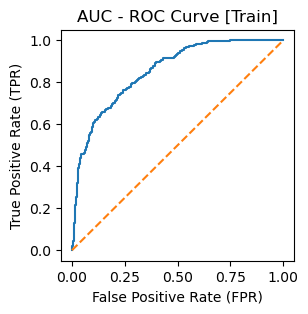

Accuracy Score (Train): 0.8518107476635515
Log_loss for Training data : 0.48213007379010697


In [41]:
# to check AUC_ROC score & Curve
from sklearn.metrics import log_loss
plt.figure(figsize=(3,3))
plt.title('AUC - ROC Curve [Train]')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

fpr,tpr,thresh = roc_curve(y_train,y_pred_prob_train)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()


AUC_Score = roc_auc_score(y_train, y_pred_prob_train)
print('Accuracy Score (Train):',AUC_Score)
Loss_train = log_loss(y_train,y_pred_prob_train)
print('Log_loss for Training data :',Loss_train)

In [42]:
#### Evaluating on Training data

In [43]:
y_pred_test = model_LR.predict(SS_X_test)
y_pred_prob_test = model_LR.predict_proba(SS_X_test)[:,1]

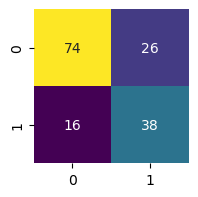

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       100
           1       0.59      0.70      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154

Accuracy for testing : 0.727
Precision for testing : 0.594
Recall for testing : 0.704
F1 for testing : 0.644


In [44]:
plt.figure(figsize=(2,2))
CM = confusion_matrix(y_test, y_pred_test)
sns.heatmap(CM, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_test, y_pred_test))
evalute_logisticreg(y_test, y_pred_test)

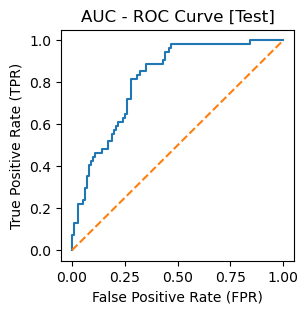

Accuracy Score (Train): 0.815
Log_loss for Testing data : 0.5413024068297998


In [45]:
# to check AUC_ROC score & Curve
from sklearn.metrics import log_loss
plt.figure(figsize=(3,3))
plt.title('AUC - ROC Curve [Test]')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

fpr,tpr,thresh = roc_curve(y_test,y_pred_prob_test)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()


AUC_Score = roc_auc_score(y_test, y_pred_prob_test)
print('Accuracy Score (Train):',AUC_Score)
Loss_test = log_loss(y_test,y_pred_prob_test)
print('Log_loss for Testing data :',Loss_test)

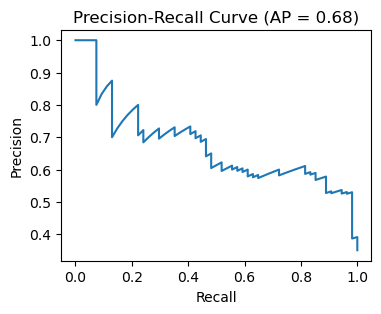

In [46]:
from sklearn.metrics import precision_recall_curve, average_precision_score


precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_test)
avg_precision = average_precision_score(y_test, y_pred_prob_test)

plt.figure(figsize=(4,3))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AP = {avg_precision:.2f})")
plt.show()


In [47]:
print('Trainig Score ')
evalute_logisticreg(y_train, y_pred_train)
print('*'*50)
print('Testing score')
evalute_logisticreg(y_test, y_pred_test)

Trainig Score 
Accuracy for testing : 0.762
Precision for testing : 0.644
Recall for testing : 0.71
F1 for testing : 0.676
**************************************************
Testing score
Accuracy for testing : 0.727
Precision for testing : 0.594
Recall for testing : 0.704
F1 for testing : 0.644


## Cross Validation

In [32]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [33]:
## StratifiedKFold Split

model = LogisticRegression(max_iter=1000, class_weight='balanced')
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv = cross_validate(model, SS_X, y, cv=SKF,
                        scoring=scoring,
                        return_train_score=True)

cv_df = (pd.DataFrame(cv)).mean()
cv_df

fit_time           0.005530
score_time         0.015061
test_accuracy      0.746015
train_accuracy     0.765624
test_precision     0.627855
train_precision    0.644251
test_recall        0.712648
train_recall       0.734153
test_f1            0.664220
train_f1           0.686195
test_roc_auc       0.836416
train_roc_auc      0.847283
dtype: float64

### Results

- As Per my Observations Model is Good for these results
- for my intrest im doing threshold tuning

Recall - Train & Test difference is only 0.02% it is acceptable




In [49]:
# to find coefficients

coef = pd.DataFrame({'Feature': X.columns,
                  'Coef':model_LR.coef_[0]})

coef


,Feature,Coef
0,Pregnancies,0.377273
1,Glucose,1.233000
2,BloodPressure,-0.023228
3,SkinThickness,0.006808
4,Insulin,-0.136065
5,BMI,0.733939
6,DiabetesPedigreeFunction,0.302084
7,Age,0.175718


## Interview Questions and Answers

#### 1. Difference between Precision and Recall ?

##### Precision:
- Of the Predicted Positives, How many are Actually Correct
- mostly used for Spam Detection
##### Recall:
- Of the Actual Positives, How many did we correctly detect 
- mostly used for Disease Detection


##### Health care: Recall is more important becz missing a sick patient is risky

#### 2. What is Cross-Validation and why is it important?

- A technique where data is split into multiple folds.  
- the model is trained and tested multiple times, and results are averaged.
- Gives stable performance estimate

##### Helps ensure the model generalizes well to unseen data.


- As Per my Observations Model is Good for these results
- for my intrest im doing threshold tuning

## threshold tuning

In [50]:
# threshold tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
threshold = np.arange(0.1,0.9,0.05)
results = []

for t in threshold:
    y_pred_t = (y_pred_prob_test >= t)

    accuracy = accuracy_score(y_test, y_pred_t)
    prec = precision_score(y_test, y_pred_t)
    recal = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)

    results.append([t,accuracy,prec,recal,f1])

results_df = pd.DataFrame(results, columns=['Threshold','Accuracy','Precision','Recall','F1'])
print(results_df)


    Threshold  Accuracy  Precision    Recall        F1
0        0.10  0.493506   0.407692  0.981481  0.576087
1        0.15  0.577922   0.452991  0.981481  0.619883
2        0.20  0.681818   0.524752  0.981481  0.683871
3        0.25  0.688312   0.531915  0.925926  0.675676
4        0.30  0.707792   0.551724  0.888889  0.680851
5        0.35  0.720779   0.564706  0.888889  0.690647
6        0.40  0.720779   0.567901  0.851852  0.681481
7        0.45  0.746753   0.605634  0.796296  0.688000
8        0.50  0.727273   0.593750  0.703704  0.644068
9        0.55  0.707792   0.578947  0.611111  0.594595
10       0.60  0.720779   0.603774  0.592593  0.598131
11       0.65  0.720779   0.622222  0.518519  0.565657
12       0.70  0.720779   0.634146  0.481481  0.547368
13       0.75  0.727273   0.657895  0.462963  0.543478
14       0.80  0.740260   0.733333  0.407407  0.523810
15       0.85  0.720779   0.720000  0.333333  0.455696


In [51]:
# To find best Threshold

best_idx = results_df['F1'].idxmax()

best_threshold = results_df.loc[best_idx, 'Threshold']
best_f1 = results_df.loc[best_idx, 'F1']

print("Best Threshold:", best_threshold)
print("Best F1 Score:", best_f1)


Best Threshold: 0.3500000000000001
Best F1 Score: 0.6906474820143885


In [55]:
## Applying the best Threshold

y_pred_prob_test = model_LR.predict_proba(SS_X_test)[:,1]
y_pred_prob_train = model_LR.predict_proba(SS_X_train)[:,1]

# Apply best Thresold
y_pred_prob_best_test = (y_pred_prob_test >= best_threshold).astype(int)
y_pred_prob_best_train = (y_pred_prob_train >= best_threshold).astype(int)


#### Evaluating on Train

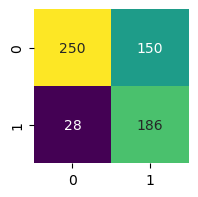

              precision    recall  f1-score   support

           0       0.90      0.62      0.74       400
           1       0.55      0.87      0.68       214

    accuracy                           0.71       614
   macro avg       0.73      0.75      0.71       614
weighted avg       0.78      0.71      0.72       614

Accuracy for testing : 0.71
Precision for testing : 0.554
Recall for testing : 0.869
F1 for testing : 0.676


In [58]:
plt.figure(figsize=(2,2))
CM= confusion_matrix(y_train, y_pred_prob_best_train)
sns.heatmap(CM, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_train, y_pred_prob_best_train))
evalute_logisticreg(y_train, y_pred_prob_best_train)

#### Evaluating on Test

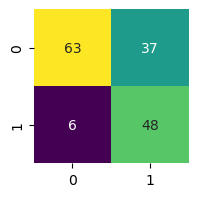

              precision    recall  f1-score   support

           0       0.91      0.63      0.75       100
           1       0.56      0.89      0.69        54

    accuracy                           0.72       154
   macro avg       0.74      0.76      0.72       154
weighted avg       0.79      0.72      0.73       154

Accuracy for testing : 0.721
Precision for testing : 0.565
Recall for testing : 0.889
F1 for testing : 0.691


In [61]:
plt.figure(figsize=(2,2))
CM= confusion_matrix(y_test, y_pred_prob_best_test)
sns.heatmap(CM, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_test, y_pred_prob_best_test))
evalute_logisticreg(y_test, y_pred_prob_best_test)

In [62]:
print('Trainig Score ')
evalute_logisticreg(y_train, y_pred_prob_best_train)
print('*'*50)
print('Testing score')
evalute_logisticreg(y_test, y_pred_prob_best_test)

Trainig Score 
Accuracy for testing : 0.71
Precision for testing : 0.554
Recall for testing : 0.869
F1 for testing : 0.676
**************************************************
Testing score
Accuracy for testing : 0.721
Precision for testing : 0.565
Recall for testing : 0.889
F1 for testing : 0.691


- comparing Old Results, After threshold tuning slightly better results Observed
- Test Results got some better
- NO Overfitting

## Deploy my Model

In [63]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(SS_X_train)

joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [64]:
print(type(scaler))

<class 'sklearn.preprocessing._data.StandardScaler'>


In [66]:


joblib.dump(model_LR, 'logistic_model.pkl')
joblib.dump(X.columns.tolist(), 'features.pkl')


['features.pkl']

In [67]:
joblib.dump(best_threshold, "best_threshold.pkl")

['best_threshold.pkl']